
IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np

LOADING AND VISUALIZING FASHION MNIST DATA

In [2]:
((training_images, training_labels), (test_images, test_labels)) = fashion_mnist.load_data()

In [3]:
print(len(training_images))
print(len(test_images))
print(len(training_labels))
print(len(test_labels))

60000
10000
60000
10000


In [4]:
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


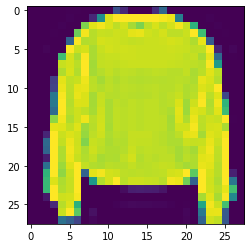

In [5]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(training_images[7])

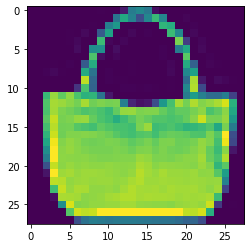

In [6]:
plt.imshow(training_images[100])

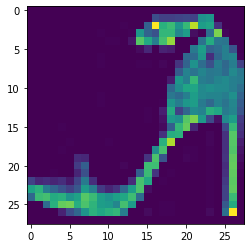

In [7]:
plt.imshow(training_images[605])

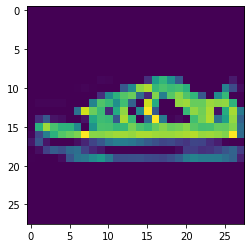

In [8]:
plt.imshow(training_images[5500])

Text(0.5, 1.0, 'SOME VISUALS OF OUR TRAINING DATA')

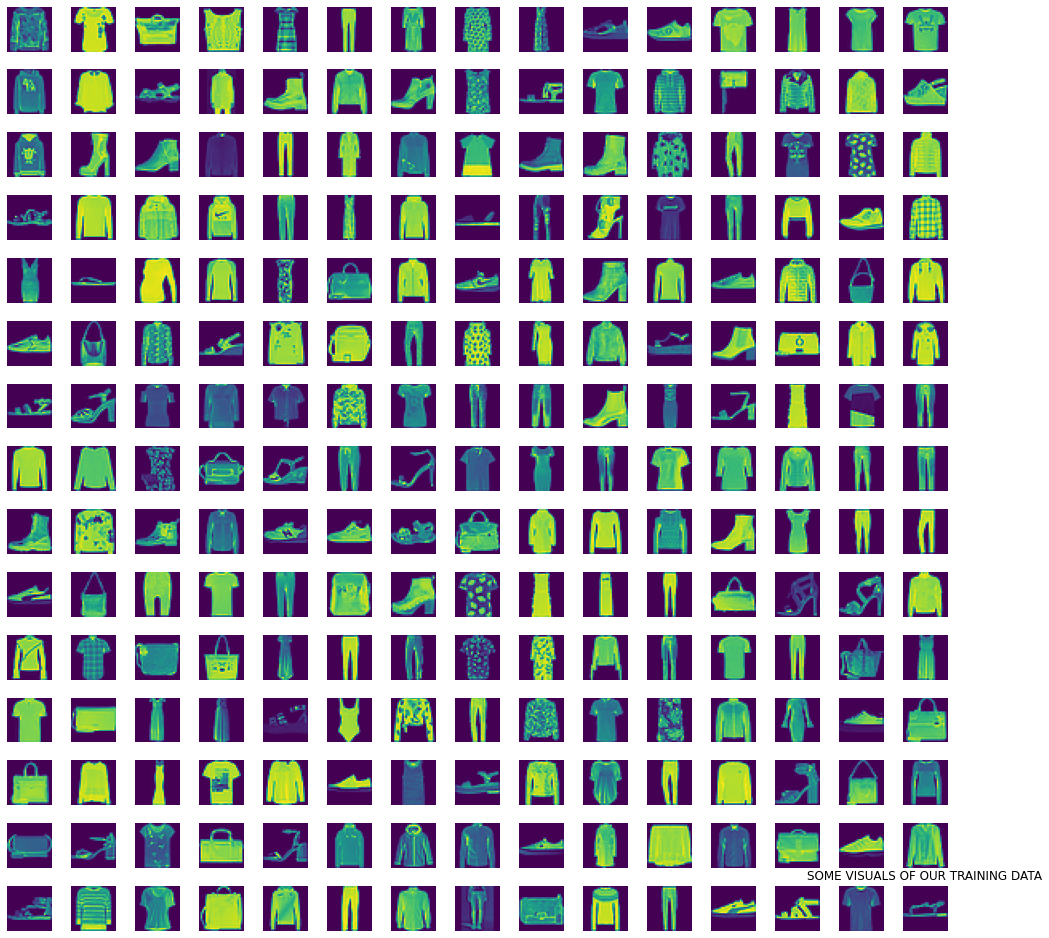

In [9]:
W_grid = 15
L_grid = 15


fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() 

n_training = len(training_images) 

for i in np.arange(0, W_grid * L_grid):  
    index = np.random.randint(0, n_training) 
    axes[i].imshow( training_images[index,:].reshape((28,28)) )
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.title("SOME VISUALS OF OUR TRAINING DATA")

NORMALIZING DATA

In [10]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

MAKING THE ANN MODEL

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(790,activation=tf.nn.relu, input_shape=(784,)),
                                    tf.keras.layers.Dense(350,activation=tf.nn.leaky_relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

COMPILING AND FITTING TRAIN FEATURES

In [13]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=15, batch_size=100)

Epoch 1/15
600/600 [==============================] - 9s 15ms/step - loss: 0.2369 - accuracy: 0.9124
Epoch 2/15
600/600 [==============================] - 9s 15ms/step - loss: 0.2258 - accuracy: 0.9172
Epoch 3/15
600/600 [==============================] - 9s 14ms/step - loss: 0.2195 - accuracy: 0.9183
Epoch 4/15
600/600 [==============================] - 9s 15ms/step - loss: 0.2126 - accuracy: 0.9208
Epoch 5/15
600/600 [==============================] - 9s 15ms/step - loss: 0.2075 - accuracy: 0.9230
Epoch 6/15
600/600 [==============================] - 9s 14ms/step - loss: 0.2018 - accuracy: 0.9243
Epoch 7/15
600/600 [==============================] - 9s 14ms/step - loss: 0.1981 - accuracy: 0.9262
Epoch 8/15
600/600 [==============================] - 9s 14ms/step - loss: 0.1925 - accuracy: 0.9283
Epoch 9/15
600/600 [==============================] - 9s 15ms/step - loss: 0.1882 - accuracy: 0.9312
Epoch 10/15
600/600 [==============================] - 9s 14ms/step - loss: 0.1841 - accura

EVALUATING TEST FEATURES

In [14]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5077 - accuracy: 0.8913


[0.5077393054962158, 0.8913000226020813]